# https://github.com/arrunkumarrusd/IOT-Mod3-Linearregression-for-IOT
# Linear Regression Analysis and Prediction for IoT - Arunkuamr Rajaganapthy

This notebook holds the Assignment 3.1 for Module 3 in AAI 530, Data Analytics and the Internet of Things. In this assignment, you will use linear regression to make predictions for simulated "streaming" data. The work that you do in this assignment will build on the linear regression predictions that you saw in your text book and in this week's lab session. Be sure to answer the analysis questions thoroughly, as this is a large part of the assignment for this week.

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [77]:
#use this cell to import additional libraries or define helper functions
import time
from sklearn.metrics import mean_squared_error as mse # Import the mean_squared_error function from scikit-learn

## Load and prepare your data

We'll be using the cleaned household electric consumption dataset from Module 2 in this assignment. I recommend saving your dataset by running df.to_csv("filename") at the end of the last assignment so that you don't have to re-do your cleaning steps. If you are not confident in your own cleaning steps, you may ask your instructor for a cleaned version of the data. You will not be graded on the cleaning steps in this assignment, but some functions may not work if you use the raw data.

We need to turn our datetime column into a numeric value to be used as a variable in our linear regression. In the lab session, we created a new column of minutes and just incremented the value by 10 since we knew that the readings occurred every 10 minutes. In this dataset, we have readings every minute, but we might have some missing rows depending on how you cleaned your data. So instead we will convert our datetime column to something called [unix/epoch time](https://en.wikipedia.org/wiki/Unix_time), which is the number of seconds since midnight on 1/1/1970.

**TODO: load your data and convert the datetime column into epoch/unix time**

In [3]:
#Load your data into a pandas dataframe here
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving household_power_clean.csv to household_power_clean.csv


In [4]:
df_raw = pd.read_csv("household_power_clean.csv", delimiter = ",")

In [5]:
df_raw.head()

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly
0,0,2006-12-16,17:24:00,4.21600,0.41800,234.84000,18.40000,0.00000,1.00000,17.00000,2006-12-16 17:24:00,NaN,NaN,NaN,NaN
1,1,2006-12-16,17:25:00,5.36000,0.43600,233.63000,23.00000,0.00000,1.00000,16.00000,2006-12-16 17:25:00,NaN,NaN,NaN,NaN
2,2,2006-12-16,17:26:00,5.37400,0.49800,233.29000,23.00000,0.00000,2.00000,17.00000,2006-12-16 17:26:00,NaN,NaN,NaN,NaN
3,3,2006-12-16,17:27:00,5.38800,0.50200,233.74000,23.00000,0.00000,1.00000,17.00000,2006-12-16 17:27:00,NaN,NaN,NaN,NaN
4,4,2006-12-16,17:28:00,3.66600,0.52800,235.68000,15.80000,0.00000,1.00000,17.00000,2006-12-16 17:28:00,NaN,NaN,NaN,NaN


In [6]:
df_raw.dtypes

,0
Unnamed: 0,int64
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [7]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()

# Combine 'Date' and 'Time' columns into 'Datetime' and convert to datetime datatype
# Changed the format string to match the actual format of the date and time data
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
# Save the DataFrame as a .csv file
df.to_csv("household_power_consumption.csv", index=False)

# Display the DataFrame with the new 'Datetime' column
print(df.dtypes)
print(df.head())

Unnamed: 0                        int64
Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
gap_monthly                     float64
grp_monthly                     float64
v_monthly                       float64
gi_monthly                      float64
dtype: object
   Unnamed: 0        Date      Time  Global_active_power  \
0           0  2006-12-16  17:24:00              4.21600   
1           1  2006-12-16  17:25:00              5.36000   
2           2  2006-12-16  17:26:00              5.37400   
3           3  2006-12-16  17:27:00              5.38800   
4           4  2006-12-16  17:28:00              3.66600   

   Global_reactive_power 

In [8]:
df_raw.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,gap_monthly,grp_monthly,v_monthly,gi_monthly
count,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049251.00000,2049251.00000,2049251.00000,2049251.00000
mean,1031495.73996,1.09162,0.12371,240.83986,4.62776,1.12192,1.29852,6.45845,1.09159,0.12371,240.83991,4.62766
std,596458.61014,1.05729,0.11272,3.23999,4.44440,6.15303,5.82203,8.43715,0.95162,0.07737,3.08063,3.98798
min,0.00000,0.07600,0.00000,223.20000,0.20000,0.00000,0.00000,0.00000,0.08167,0.00000,225.58733,0.22000
25%,516253.75000,0.30800,0.04800,238.99000,1.40000,0.00000,0.00000,0.00000,0.33013,0.06960,239.10500,1.46000
50%,1028638.50000,0.60200,0.10000,241.01000,2.60000,0.00000,0.00000,1.00000,0.71433,0.10300,240.98400,3.07333
75%,1545307.25000,1.52800,0.19400,242.89000,6.40000,0.00000,1.00000,17.00000,1.56993,0.15933,242.76700,6.56000
max,2075258.00000,11.12200,1.39000,254.15000,48.40000,88.00000,80.00000,31.00000,7.96620,0.78973,252.44233,34.23333


In [9]:
df.describe()

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly
count,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280,2049251.00000,2049251.00000,2049251.00000,2049251.00000
mean,1031495.73996,1.09162,0.12371,240.83986,4.62776,1.12192,1.29852,6.45845,2008-12-02 00:59:44.397740544,1.09159,0.12371,240.83991,4.62766
min,0.00000,0.07600,0.00000,223.20000,0.20000,0.00000,0.00000,0.00000,2006-12-16 17:24:00,0.08167,0.00000,225.58733,0.22000
25%,516253.75000,0.30800,0.04800,238.99000,1.40000,0.00000,0.00000,0.00000,2007-12-10 05:37:45,0.33013,0.06960,239.10500,1.46000
50%,1028638.50000,0.60200,0.10000,241.01000,2.60000,0.00000,0.00000,1.00000,2008-11-30 01:22:30,0.71433,0.10300,240.98400,3.07333
75%,1545307.25000,1.52800,0.19400,242.89000,6.40000,0.00000,1.00000,17.00000,2009-11-23 20:31:15,1.56993,0.15933,242.76700,6.56000
max,2075258.00000,11.12200,1.39000,254.15000,48.40000,88.00000,80.00000,31.00000,2010-11-26 21:02:00,7.96620,0.78973,252.44233,34.23333
std,596458.61014,1.05729,0.11272,3.23999,4.44440,6.15303,5.82203,8.43715,NaN,0.95162,0.07737,3.08063,3.98798


In [10]:
#create your Datetime column
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-10-d9f29fbc2aae>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [11]:
#create your Datetime column
df['Date'] = pd.to_datetime(df_raw['Date']) # Use the original 'Date' column from df_raw
df['Time'] = pd.to_datetime(df_raw['Time'], format='%H:%M:%S').dt.time # Use the original 'Time' column from df_raw and format it

In [12]:
df.Date[0]

Timestamp('2006-12-16 00:00:00')

In [13]:
df.dtypes

,0
Unnamed: 0,int64
Date,datetime64[ns]
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [14]:
df.dtypes

,0
Unnamed: 0,int64
Date,datetime64[ns]
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [15]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [16]:
df.Date[0]

datetime.date(2006, 12, 16)

In [17]:
df.Time[0]

datetime.time(17, 24)

In [18]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049251.0000,2049251.0000,2049251.0000,2049251.00000
mean,1031495.7400,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,.4f,1.0916,0.1237,240.8399,4.62766
min,0.0000,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,.4f,0.0817,0.0000,225.5873,0.22000
25%,516253.7500,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,.4f,0.3301,0.0696,239.1050,1.46000
50%,1028638.5000,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,.4f,0.7143,0.1030,240.9840,3.07333
75%,1545307.2500,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,.4f,1.5699,0.1593,242.7670,6.56000
max,2075258.0000,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,.4f,7.9662,0.7897,252.4423,34.23333
std,596458.6101,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,nan,0.9516,0.0774,3.0806,3.98798


In [19]:
    #df.describe(datetime_is_numeric = True)
    #TypeError: NDFrame.describe() got an unexpected keyword argument 'datetime_is_numeric'

    #type error in colab due to old py pandas version 2.2.2,  using syntax accordigly
    df.describe(include=['number', 'datetime'])

,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly
count,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280.00000,2049280,2049251.00000,2049251.00000,2049251.00000,2049251.00000
mean,1031495.73996,1.09162,0.12371,240.83986,4.62776,1.12192,1.29852,6.45845,2008-12-02 00:59:44.397740544,1.09159,0.12371,240.83991,4.62766
min,0.00000,0.07600,0.00000,223.20000,0.20000,0.00000,0.00000,0.00000,2006-12-16 17:24:00,0.08167,0.00000,225.58733,0.22000
25%,516253.75000,0.30800,0.04800,238.99000,1.40000,0.00000,0.00000,0.00000,2007-12-10 05:37:45,0.33013,0.06960,239.10500,1.46000
50%,1028638.50000,0.60200,0.10000,241.01000,2.60000,0.00000,0.00000,1.00000,2008-11-30 01:22:30,0.71433,0.10300,240.98400,3.07333
75%,1545307.25000,1.52800,0.19400,242.89000,6.40000,0.00000,1.00000,17.00000,2009-11-23 20:31:15,1.56993,0.15933,242.76700,6.56000
max,2075258.00000,11.12200,1.39000,254.15000,48.40000,88.00000,80.00000,31.00000,2010-11-26 21:02:00,7.96620,0.78973,252.44233,34.23333
std,596458.61014,1.05729,0.11272,3.23999,4.44440,6.15303,5.82203,8.43715,NaN,0.95162,0.07737,3.08063,3.98798


<Axes: >

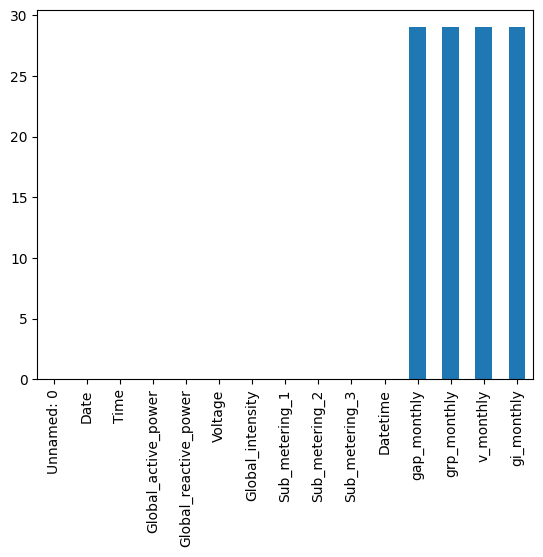

In [20]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

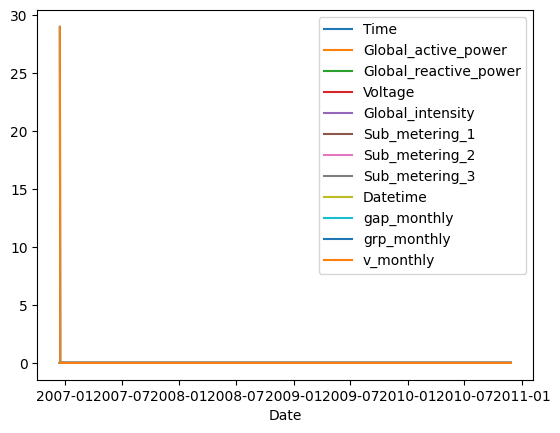

In [21]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

<Axes: xlabel='Date'>

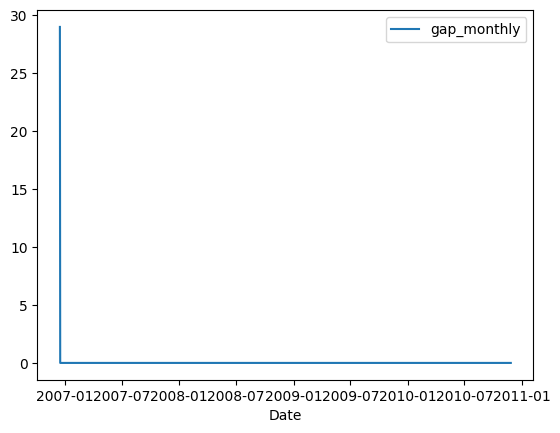

In [22]:
df_na.plot(x='Date', y='gap_monthly')

In [23]:
#convert datetime to epoch/unix time
#df['unix'] = ?

# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Convert the 'Date' column to epoch/unix time
df['unix'] = df['Date'].apply(lambda x: int(time.mktime(x.timetuple())))

# Display the DataFrame with the new 'Unix_Time' column
print(df.head())



   Unnamed: 0       Date      Time  Global_active_power  \
0           0 2006-12-16  17:24:00              4.21600   
1           1 2006-12-16  17:25:00              5.36000   
2           2 2006-12-16  17:26:00              5.37400   
3           3 2006-12-16  17:27:00              5.38800   
4           4 2006-12-16  17:28:00              3.66600   

   Global_reactive_power   Voltage  Global_intensity  Sub_metering_1  \
0                0.41800 234.84000          18.40000         0.00000   
1                0.43600 233.63000          23.00000         0.00000   
2                0.49800 233.29000          23.00000         0.00000   
3                0.50200 233.74000          23.00000         0.00000   
4                0.52800 235.68000          15.80000         0.00000   

   Sub_metering_2  Sub_metering_3            Datetime  gap_monthly  \
0         1.00000        17.00000 2006-12-16 17:24:00          NaN   
1         1.00000        16.00000 2006-12-16 17:25:00          NaN   
2 

## Predicting Global Active Power

We will follow the code from the Chapter 9 in our textbook and the recorded lab session from this week to predict the Global Active Power (GAP) with linear regression.

First we will create our x (time) and y (GAP) training variables, and then define our model parameters.

**Q: What is ph? What is mu?**

A: Mu is the foregettting factor
Ph is the Prediction horizon on how far in future the values to be predicted for a Time series

**TODO: Set the ph to be 5 minutes--consider the units that our time column is measured in.**

In [24]:
ts = pd.DataFrame(df.unix)
# Add moving average of Voltage as the response variable
#df['GAP_MA'] = df['Global_active_power'].rolling(window=30).mean()
#ys = pd.DataFrame(df.GAP_MA)
#Original
ys = pd.DataFrame(df.Global_active_power)

ph = 5#5 minutes
ph_index = 12#ph/data resolution (how many timesteps is our ph?)
mu = 0.9

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)


In [25]:
tp_pred

array([0., 0., 0., ..., 0., 0., 0.])

**Q: With mu = 0.9, how much weight will our first data point have on the last (5000th) prediction in our limited dataset?**

A: Mu ^n_s
0.9^5000 = 1.6313501853426258743032567291812e-229

**TODO: Following the code from Chapter 9 and the lab session, use linear regression to predict a rolling GAP for our dataset. Store these predictions in the tp_pred and yp_pred lists created above for visualization.**

In [26]:
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp =  ys[0:i]
    ns = len(ys_tmp)


    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k #More distant examples are downweighted exponentially
    weights = np.flip(weights, 0)

    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp =  ts.iloc[i-1,0] + ph #next time stamp
    yp = m_tmp*tp + q_tmp #y=mx + b

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

Streaming output truncated to the last 5000 lines.
<ipython-input-26-cde508226928>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-26-cde508226928>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-26-cde508226928>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yp_pred[i-2] = yp
<ipython-input-26-cde508226928>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated

Now let's visualize the results from our model.

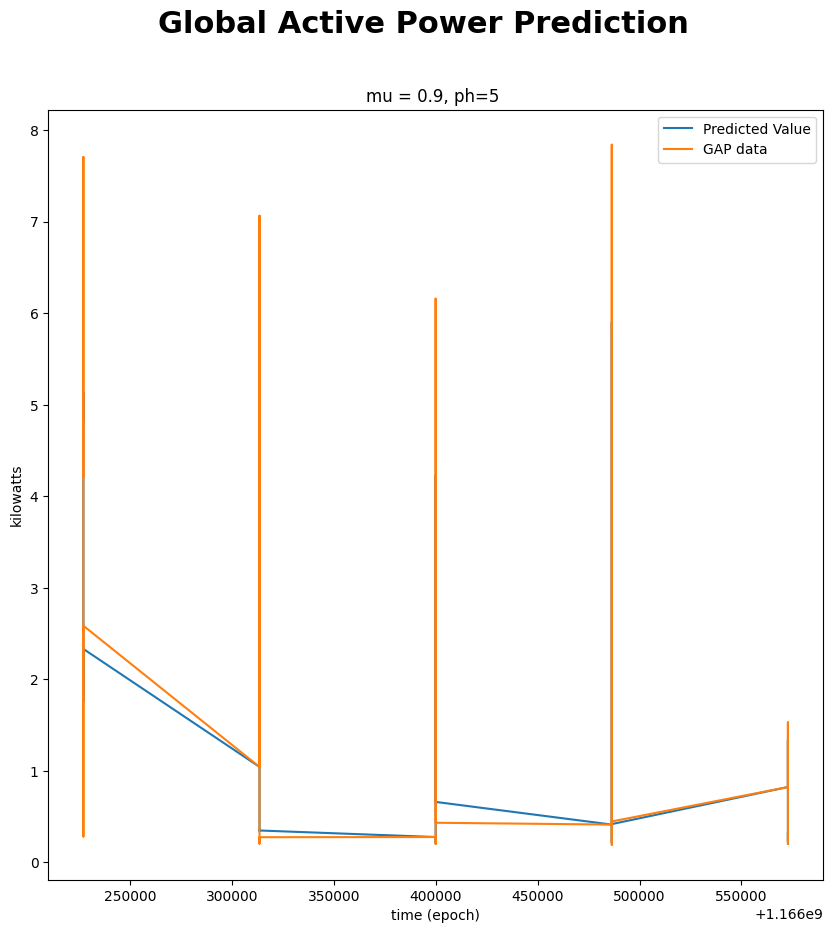

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

It's difficult to tell how the model is performing from this plot.

**TODO: Modify the code above to visualize the first and last 200 datapoints/predictions (can be in separate charts) and compute the MSE for our predictions.**

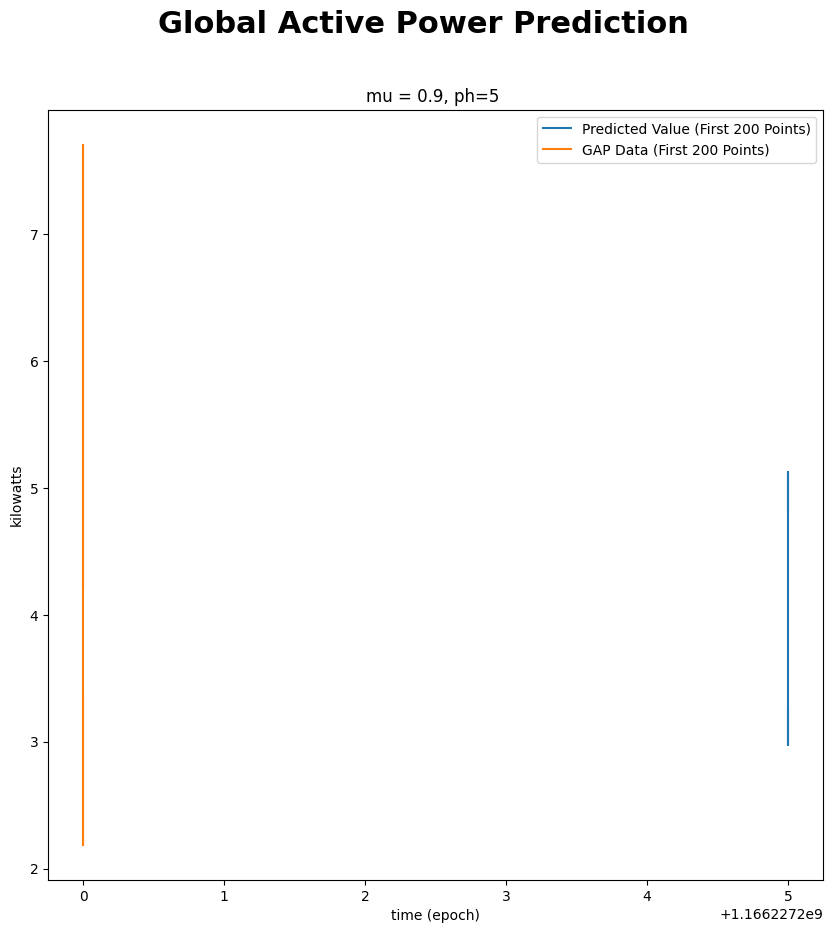

In [28]:
#Plot first 200 data points/predictions


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
#ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value (First 200 Points)')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP Data (First 200 Points)')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

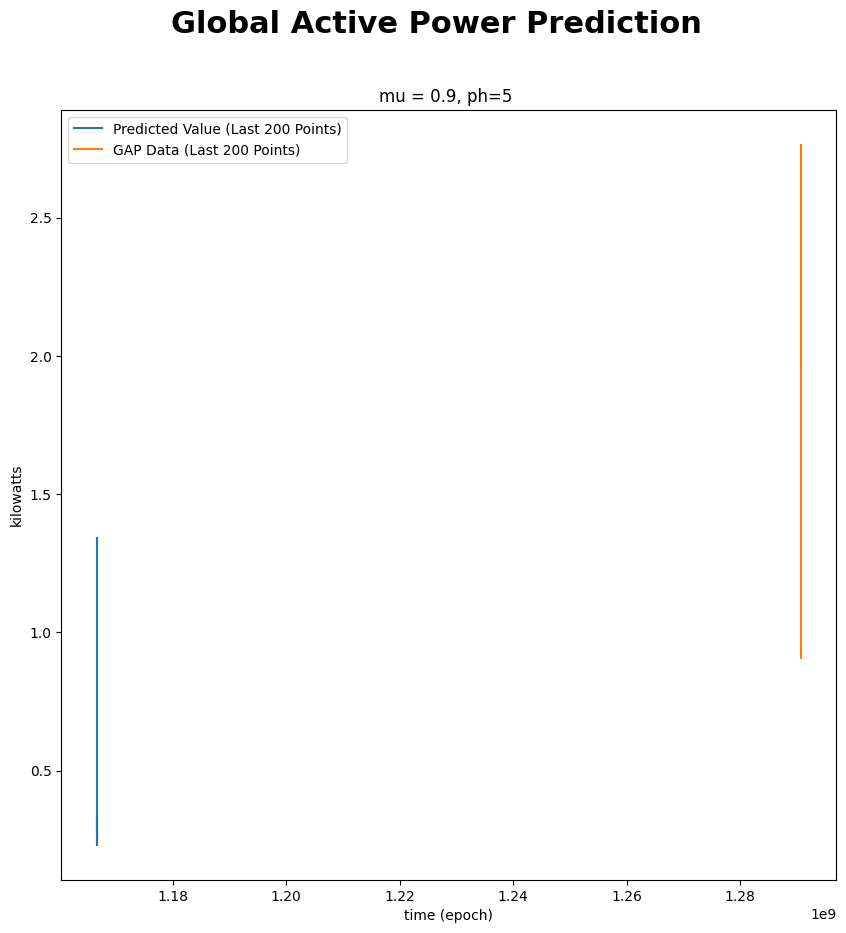

In [29]:
#Plot LAST 200 data points/predictions


fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
#ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value (Last 200 Points)')
ax.plot(ts.iloc[-200:,0], ys.iloc[-200:,0], label='GAP Data (Last 200 Points)')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

In [30]:
#Calculate MSE of predictions
print("MSE of GAP for Mu = 0.9 is", mse(ys['Global_active_power'][ph_index:5000+ph_index-1],yp_pred))

MSE of GAP for Mu = 0.9 is 0.7938122805785183


**Q: How did our model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A:  It produced only one single data point for the first 200 data points, probably more data is required to align

What do you observe on the charts?

Early predictions are way lesser  ~ 3 to5 KW against ~ 2.2 KW to 7.8 KW, while late predictions are way lesser between 0.2 to 1.4 KW than the actuals ~0.9 KW to 2.8KW


Is there a difference between the early and the late predictions?

Early predictions are way lesser  ~ 3 to5 KW against ~ 2.2 KW to 7.8 KW, while late predictions are way lesser between 0.2 to 1.4 KW than the actuals ~0.9 KW to 2.8KW

What does the MSE tell you?

MSE is 0.7938122805785183, indicating room for improvement for the mean squared error, to understand if it is good or bad compariing with other models, but when mu = 0.9, it seems optimal

**TODO: Re-run the prediction code with mu = 1 and mu = 0.01. Use the cells below to produce charts for the first and last 200 points and to compute the MSE for each of these sets of predictions.**

In [ ]:
#Re-run prediction code for mu = 1
ph = 5#5 minutes
ph_index = 12#ph/data resolution (how many timesteps is our ph?)
mu = 1

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp =  ys[0:i]
    ns = len(ys_tmp)


    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k #More distant examples are downweighted exponentially
    weights = np.flip(weights, 0)

    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp =  ts.iloc[i-1,0] + ph #next time stamp
    yp = m_tmp*tp + q_tmp #y=mx + b

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp


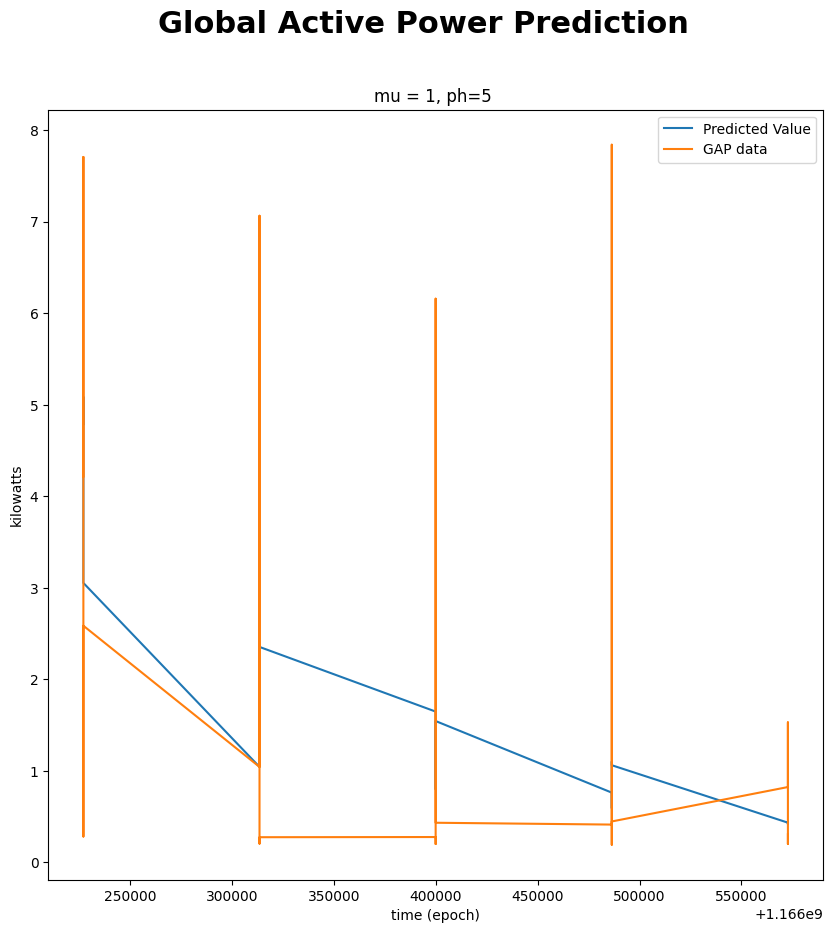

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

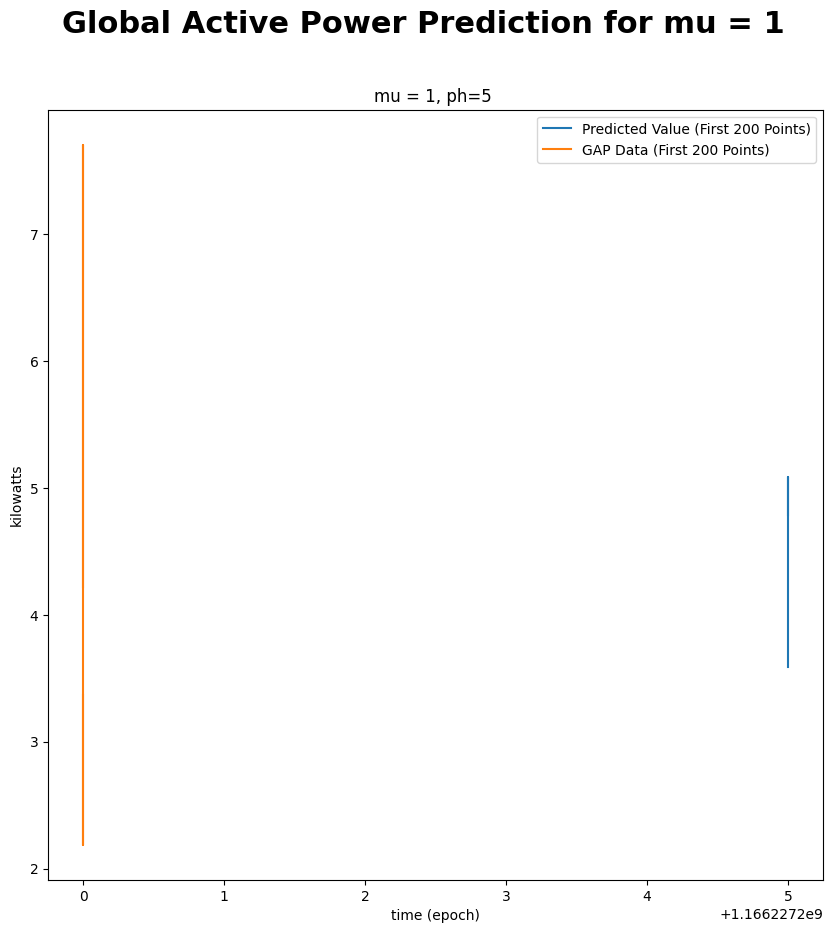

In [33]:
#Plot first 200 data points/predictions for mu = 1

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction for mu = 1', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
#ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value (First 200 Points)')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP Data (First 200 Points)')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

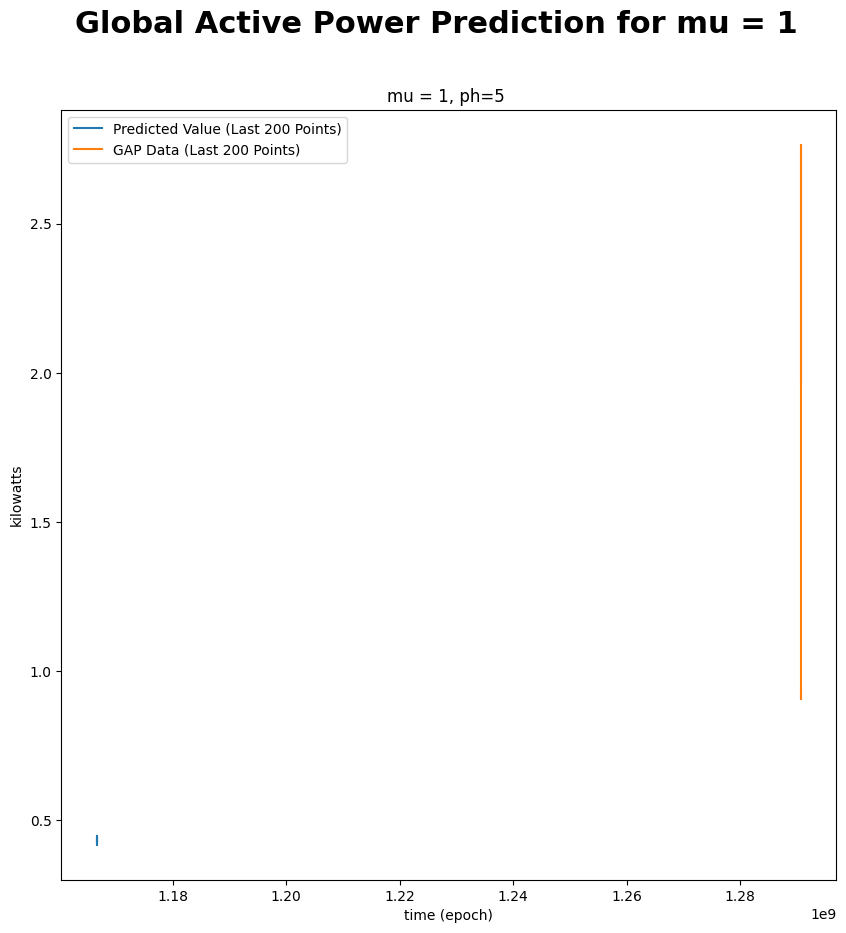

In [34]:
#Plot last 200 data points/predictions for mu = 1

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction for mu = 1', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
#ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value (Last 200 Points)')
ax.plot(ts.iloc[-200:,0], ys.iloc[-200:,0], label='GAP Data (Last 200 Points)')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

In [35]:
#Calculate MSE of predictions for mu = 1

print("MSE of predictions for mu = 1 is", mse(ys['Global_active_power'][ph_index:5000+ph_index-1],yp_pred))

MSE of predictions for mu = 1 is 1.2947716283134225


In [ ]:
#Re-run prediction code for mu = 0.01
ph = 5#5 minutes
ph_index = 12#ph/data resolution (how many timesteps is our ph?)
mu = 0.01

#let's limit the number of samples in our model to 5000 just for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred = np.zeros(n_s-1)
# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):# start out with 2 leading datapoints
    #get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp =  ys[0:i]
    ns = len(ys_tmp)


    weights = np.ones(ns)*mu
    for k in range(ns):
        #adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k]**k #More distant examples are downweighted exponentially
    weights = np.flip(weights, 0)

    #perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    #store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    #use ph to make the model prediction according to the prediction time
    tp =  ts.iloc[i-1,0] + ph #next time stamp
    yp = m_tmp*tp + q_tmp #y=mx + b

    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

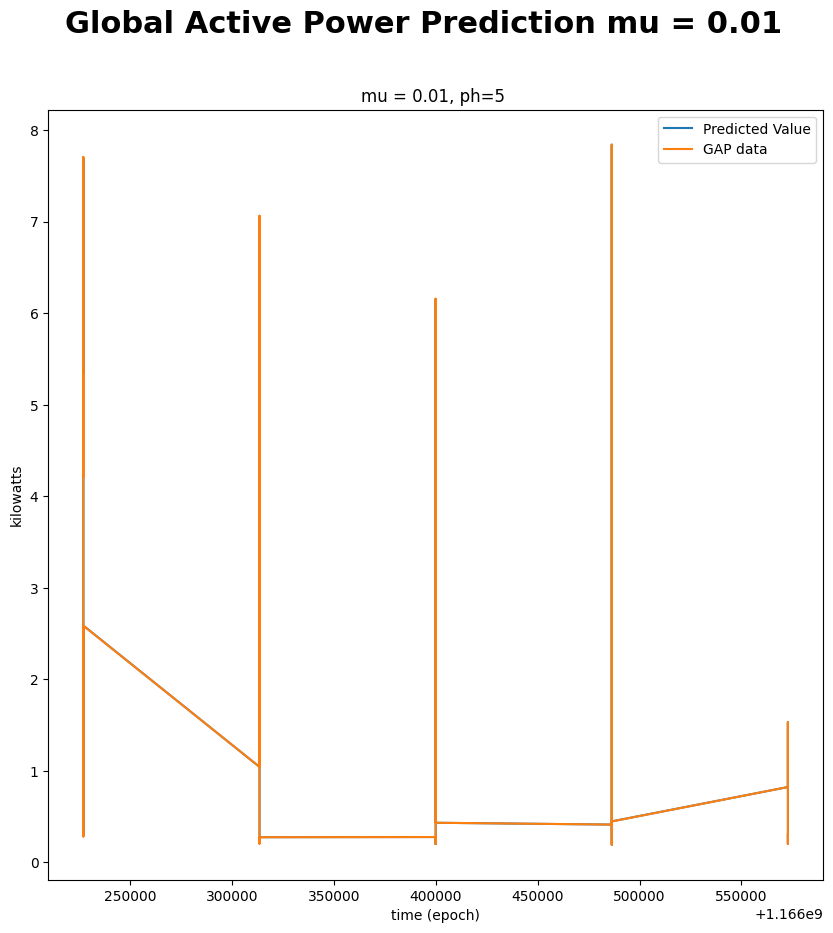

In [37]:

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction mu = 0.01', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()


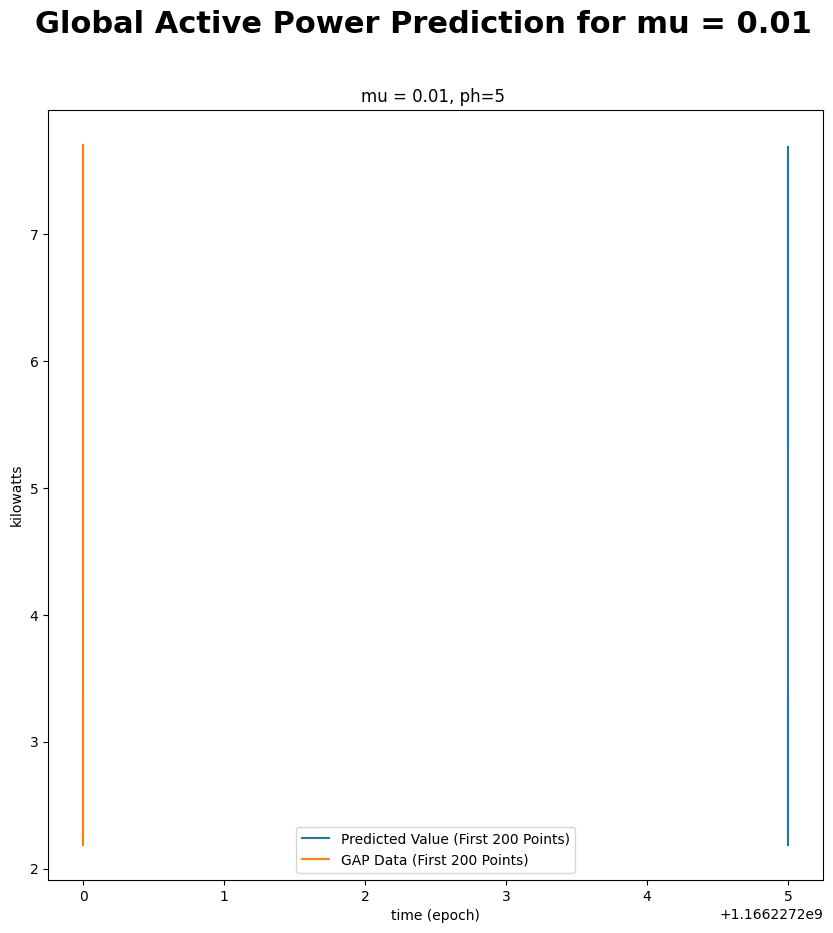

In [38]:
#Plot first 200 data points/predictions for mu = 0.01
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction for mu = 0.01', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
#ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.plot(tp_pred[0:200], yp_pred[0:200], label='Predicted Value (First 200 Points)')
ax.plot(ts.iloc[0:200,0], ys.iloc[0:200,0], label='GAP Data (First 200 Points)')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

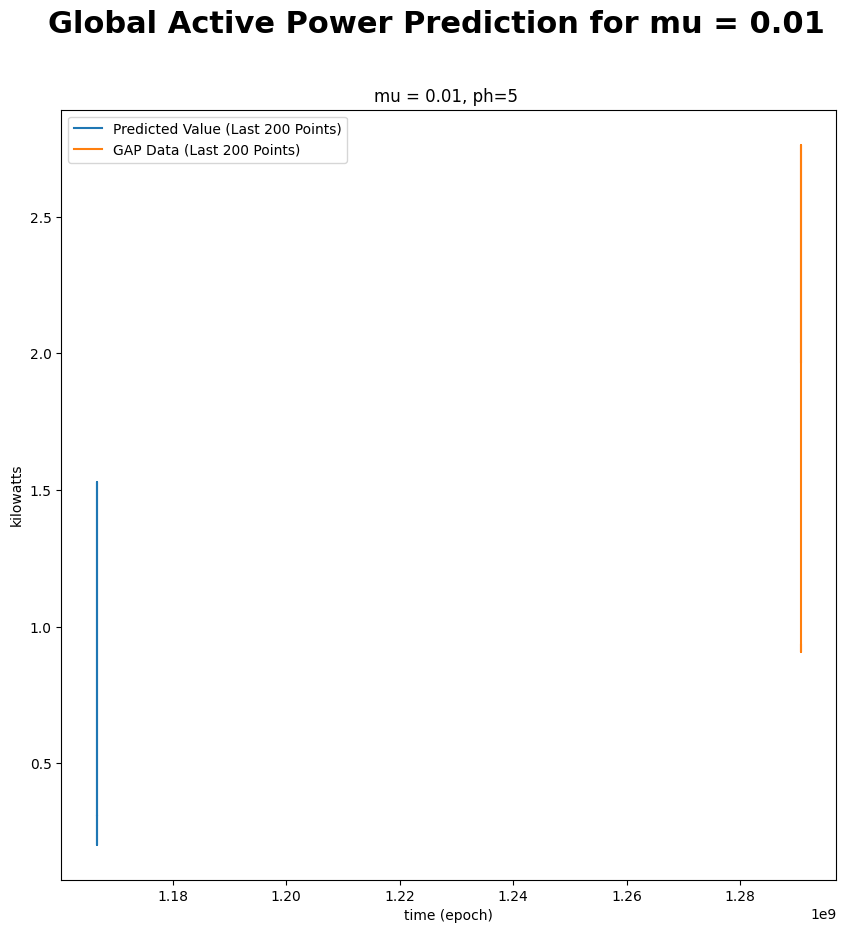

In [39]:
#Plot last 200 data points/predictions for mu = 0.01

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power Prediction for mu = 0.01', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
#ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='GAP data')
ax.plot(tp_pred[-200:], yp_pred[-200:], label='Predicted Value (Last 200 Points)')
ax.plot(ts.iloc[-200:,0], ys.iloc[-200:,0], label='GAP Data (Last 200 Points)')
ax.set_xlabel('time (epoch)')
ax.set_ylabel('kilowatts')
ax.legend()

In [40]:
#Calculate MSE of predictions for mu = 0.01
print("MSE of predictions for mu = 0.01 is", mse(ys['Global_active_power'][ph_index:5000+ph_index-1],yp_pred))

MSE of predictions for mu = 0.01 is 0.8447144454420524


**Q: How did our mu = 1 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A:  Early prediction seemed to work well, however the late prediction isthe one which had issues
MSE of predictions for mu = 1 is 1.2947716283134225

**Q: How did our mu = 0.01 model perform? What do you observe on the charts? Is there a difference between the early and the late predictions? What does the MSE tell you?**

A: MSE of predictions for mu = 0.01 is 0.8447144454420524

**Q: Which of these three models is the best? How do you know? Why does this make sense based on the mu parameter used?**

A: out of the three mu with 0.9 has better MSE of GAP for Mu  0.9 is 0.7938122805785183, whbich seems lower interms of the MSE and henc it is better

**Q: What could we do to improve our model and/or make it more realistic and useful?**

A: Possible feature engineering steps, to add addtional relevant metrics, historical events , better handling of missing data, interms of processing, was not sure about prior dataset so used form git, also additional complex models which levarges neural net, might guve, test train and predict, realtime dataset striking balance is crucial, utilize Root Mean Squared Error (RMSE) to hav ebetter comparision.

**TODO: Add voltage data as a second variable to our model and re-run the prediction code. Then visualize the first and last 200 points and compute the MSE**

In [ ]:
#add voltage as second variables in our dataset
# Create DataFrame for time stamps
ts = pd.DataFrame(df.unix)

# Include "Global_active_power" and "Voltage" in the response variables
ys = pd.DataFrame({
    'Global_active_power': df.Global_active_power,
    'Voltage': df.Voltage
})

ph = 5  # 5 minutes
ph_index = 12  # ph/data resolution (how many timesteps is our ph?)
mu = 0.9

# Limit the number of samples in our model to 5000 for speed
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1)
yp_pred_power = np.zeros(n_s-1)
yp_pred_voltage = np.zeros(n_s-1)

# At every iteration of the for loop a new data sample is acquired
for i in range(2, n_s+1):  # start out with 2 leading datapoints
    # Get x and y data "available" for our prediction
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)

    weights = np.ones(ns) * mu
    for k in range(ns):
        # Adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k] ** k  # More distant examples are downweighted exponentially
    weights = np.flip(weights, 0)

    # Perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    # Store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    # Use ph to make the model prediction according to the prediction time
    tp = ts.iloc[i-1, 0] + ph  # Next time stamp
    yp_power = np.dot(m_tmp[0], tp) + q_tmp[0]  # y = mx + b for Global_active_power
    yp_voltage = np.dot(m_tmp[1], tp) + q_tmp[1]  # y = mx + b for Voltage

    tp_pred[i-2] = tp
    yp_pred_power[i-2] = yp_power
    yp_pred_voltage[i-2] = yp_voltage



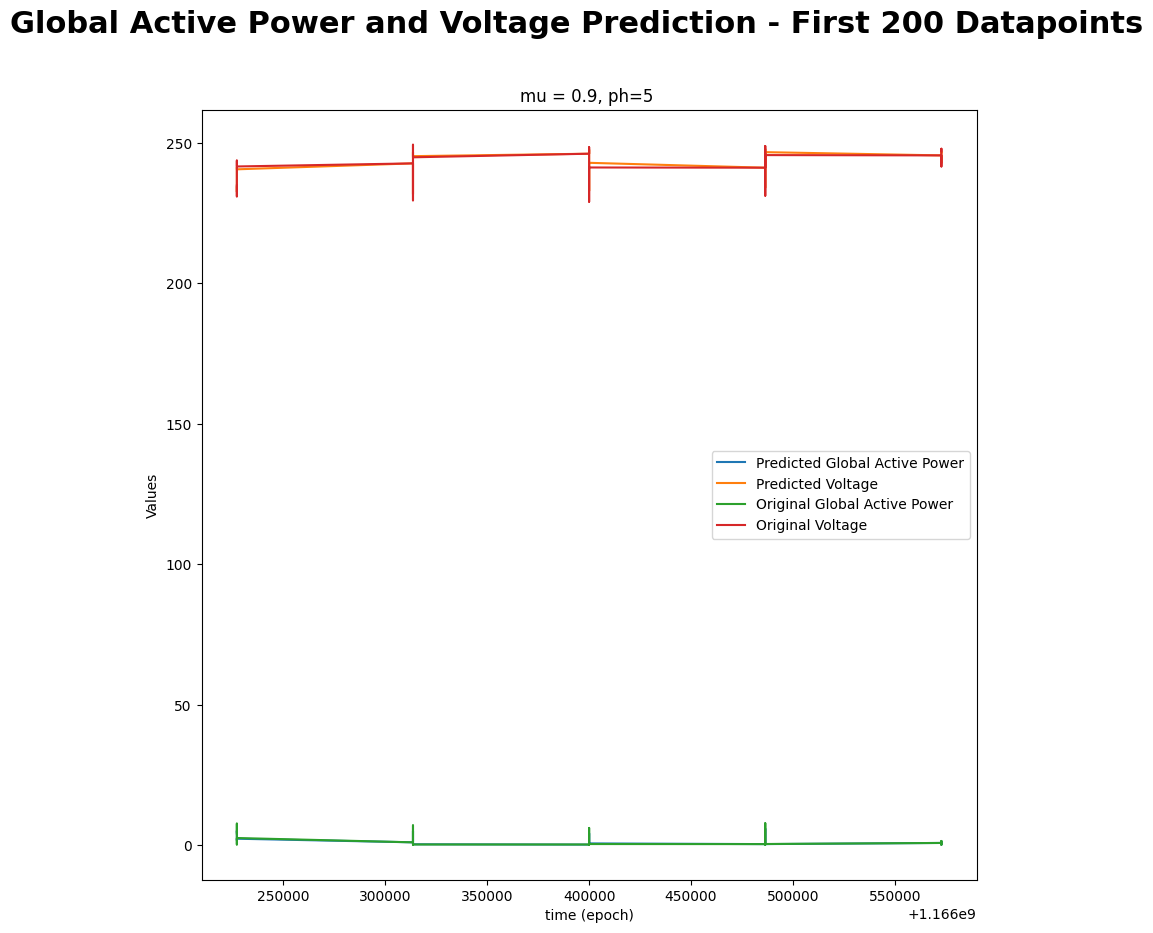

In [51]:
#run the prediction code on your expanded dataset
#make sure to adjust your yp prediction to include the coefficients from time AND voltage

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power and Voltage Prediction - First 200 Datapoints', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

# Plot predicted values for Global_active_power and Voltage
ax.plot(tp_pred, yp_pred_power, label='Predicted Global Active Power')
ax.plot(tp_pred, yp_pred_voltage, label='Predicted Voltage')

# Plot original data for Global_active_power and Voltage
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='Original Global Active Power')
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,1], label='Original Voltage')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('Values')
ax.legend()


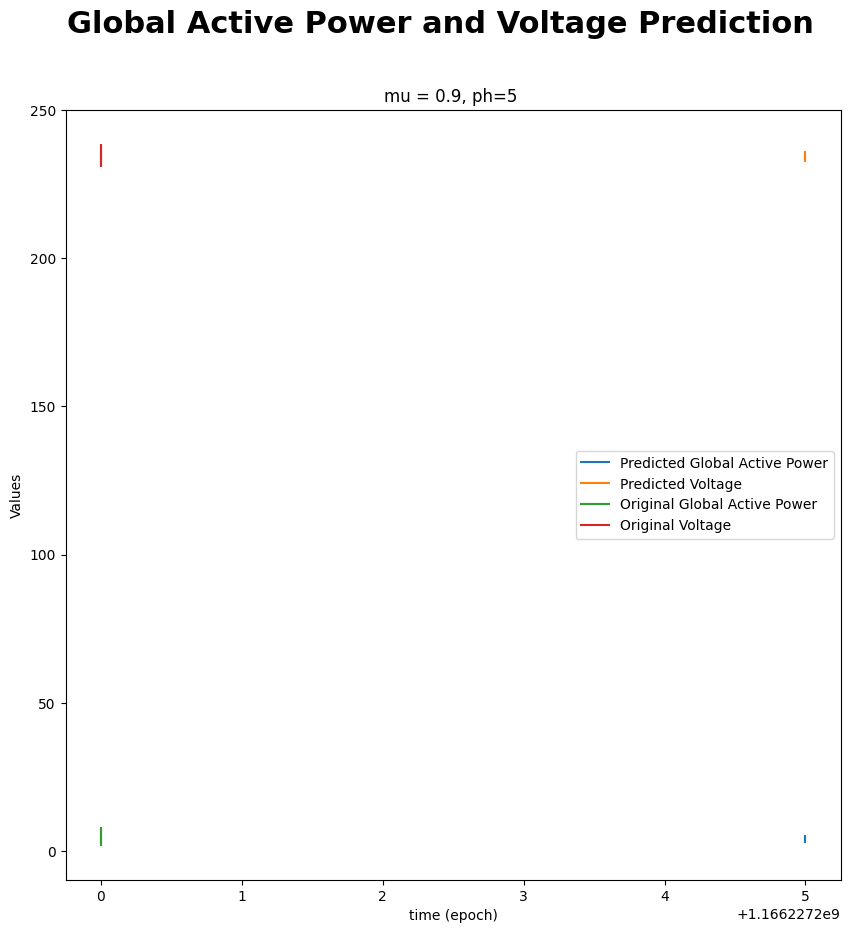

In [52]:

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power and Voltage Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

# Plot predicted values for Global_active_power and Voltage for the first 200 datapoints
ax.plot(tp_pred[:200], yp_pred_power[:200], label='Predicted Global Active Power')
ax.plot(tp_pred[:200], yp_pred_voltage[:200], label='Predicted Voltage')

# Plot original data for Global_active_power and Voltage for the first 200 datapoints
ax.plot(ts.iloc[:200,0], ys.iloc[:200,0], label='Original Global Active Power')
ax.plot(ts.iloc[:200,0], ys.iloc[:200,1], label='Original Voltage')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('Values')
ax.legend()



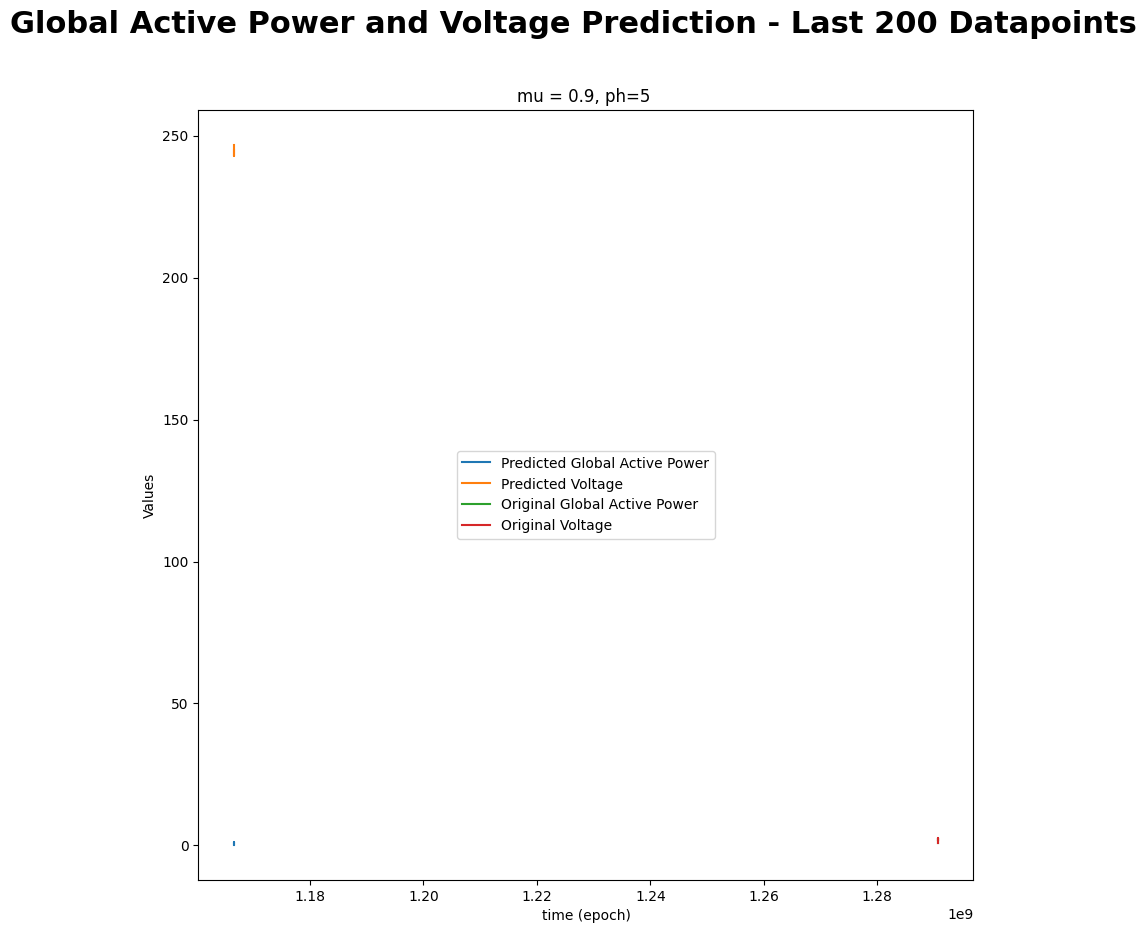

In [57]:

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Global Active Power and Voltage Prediction - Last 200 Datapoints', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))

# Plot predicted values for Global_active_power and Voltage for the first 200 datapoints
ax.plot(tp_pred[-200:], yp_pred_power[-200:], label='Predicted Global Active Power')
ax.plot(tp_pred[-200:], yp_pred_voltage[-200:], label='Predicted Voltage')

# Plot original data for Global_active_power and Voltage for the first 200 datapoints
ax.plot(ts.iloc[-200:,0], ys.iloc[-200:,0], label='Original Global Active Power')
ax.plot(ts.iloc[-200:,0], ys.iloc[-200:,0], label='Original Voltage')

ax.set_xlabel('time (epoch)')
ax.set_ylabel('Values')
ax.legend(loc='center')


In [56]:
#Calculate MSE of predictions for the expanded data
print("MSE of predictions for Voltage with mu = 0.9 is", mse(ys['Voltage'][ph_index:5000+ph_index-1],yp_pred))

# Calculate MSE
mse_power = mean_squared_error(ys.iloc[:n_s-1, 0], yp_pred_power)
mse_voltage = mean_squared_error(ys.iloc[:n_s-1, 1], yp_pred_voltage)

print("MSE for Global Active Power with mu = 0.9 is: ", mse_power)
print("MSE for Voltage with mu = 0.9 is: ", mse_voltage)


MSE of predictions for Voltage with mu = 0.9 is 57272.78778744465
MSE for Global Active Power with mu = 0.9 is:  0.28461060521614784
MSE for Voltage with mu = 0.9 is:  1.1423937418788077


**Q: How did the model performed when you added the voltage data? How does it compare to the models without it?**

A: When we added teh Voltage for the last 200 datasets alone the Voltage original and predicted seems to have aligned and the MSE for overal seems too high, which is a concern, also individually when checked twith voltage the mse is 1.142 vs 0.284 for Global Active Power

There are lots of other ways that we could try to improve our model while still using linear regression.

**TODO: Choose one alternative model and re-run the prediction code. Some ideas include:**

- Use a moving average as the response variable
- Make your prediction based on the time of day instead of as a continuous time series
- Use a moving window to limit your predictions instead of using a mu factor

**Q: Describe your alternative model and why it might improve your model**

A: Utilized time interms of hours and Rollng window for Moving average for 30 records as a average., so if there are any null values, it would help to denoise and smoothen the output, and henc it may be better output

In [ ]:
#create your alternative training data here

# Convert the 'Date' column to epoch/unix time
#df['unix'] = df['Date'].apply(lambda x: int(time.mktime(x.timetuple())))

# Add moving average of Global_active_power as the response variable
df['Voltage_MA'] = df['Voltage'].rolling(window=30).mean()

# Drop NaN values created by the rolling window
df.dropna(inplace=True)

# Add hour of the day from the Unix timestamp
df['Hour'] = pd.to_datetime(df['unix'], unit='s').dt.hour

# Define the feature and response variables
ts = pd.DataFrame({'unix': df.unix, 'Hour': df.Hour})
ys = pd.DataFrame(df.Voltage_MA)

ph = 96  # 60 minutes
ph_index = 96  # prediction horizon in timesteps ( to predict for next 96 hours)
mu = 0.9
n_s = min(len(ts), 5000)  # use the length of ts after dropping NaNs, limit to 5000

# Limit the sample size to n_s
ts = ts.iloc[:n_s]
ys = ys.iloc[:n_s]

# Arrays to hold predicted values
tp_pred = np.zeros(n_s - 1)
yp_pred = np.zeros(n_s - 1)

# At every iteration of the for loop, a new data sample is acquired
for i in range(2, n_s + 1):  # start out with 2 leading datapoints
    # Get x and y data "available" for our prediction
    ts_tmp = ts.iloc[:i]
    ys_tmp = ys.iloc[:i]
    ns = len(ys_tmp)

    weights = np.ones(ns) * mu
    for k in range(ns):
        # Adjust weights to be downweighted according to their timestep away from our prediction
        weights[k] = weights[k] ** k  # More distant examples are downweighted exponentially
    weights = np.flip(weights, 0)

    # Perform linear regression on "available" data using the mu-adjusted weights
    lm_tmp = LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

    # Store model coefficients and intercepts to compute prediction
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    # Ensure m_tmp has the expected length (2 elements)
    if len(m_tmp) < 2:
        m_tmp = np.append(m_tmp, 0)  # Append 0 if the second coefficient is missing

    # Use ph to make the model prediction according to the prediction time
    if i - 1 < len(ts):
        next_time = ts.iloc[i - 1, 0] + ph * 60  # next timestamp in Unix time
        next_hour = (ts.iloc[i - 1, 1] + (ph * 60 // 3600)) % 24  # calculate next hour, adjusting for 24-hour format
        yp = m_tmp[0] * next_time + m_tmp[1] * next_hour + q_tmp  # y = m1*x1 + m2*x2 + b

        tp_pred[i - 2] = next_time
        yp_pred[i - 2] = yp

# Convert Unix time predictions back to datetime for visualization
tp_pred_dates = pd.to_datetime(tp_pred, unit='s', errors='coerce')

# Drop NaN values in tp_pred_dates and corresponding yp_pred
valid_indices = tp_pred_dates.notna()
tp_pred_dates = tp_pred_dates[valid_indices]
yp_pred = yp_pred[valid_indices]



In [60]:
df.describe()

,Unnamed: 0,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,gap_monthly,grp_monthly,v_monthly,gi_monthly,unix,Voltage_MA,Hour
count,2049251.00000,2049251,2049251.00000,2049251.00000,2049251.00000,2049251.00000,2049251.00000,2049251.00000,2049251.00000,2049251,2049251.00000,2049251.00000,2049251.00000,2049251.00000,2049251.00000,2049251.00000,2049251.00000
mean,1031510.33699,2008-12-01 13:14:36.417968384,1.09157,0.12371,240.83995,4.62756,1.12194,1.29853,6.45830,2008-12-02 01:14:20.219309824,1.09159,0.12371,240.83991,4.62766,1228137276.41797,240.83991,0.00000
min,29.00000,2006-12-16 00:00:00,0.07600,0.00000,223.20000,0.20000,0.00000,0.00000,0.00000,2006-12-16 17:53:00,0.08167,0.00000,225.58733,0.22000,1166227200.00000,225.58733,0.00000
25%,516275.50000,2007-12-10 00:00:00,0.30800,0.04800,238.99000,1.40000,0.00000,0.00000,0.00000,2007-12-10 05:59:30,0.33013,0.06960,239.10500,1.46000,1197244800.00000,239.10500,0.00000
50%,1028653.00000,2008-11-30 00:00:00,0.60200,0.10000,241.01000,2.60000,0.00000,0.00000,1.00000,2008-11-30 01:37:00,0.71433,0.10300,240.98400,3.07333,1228003200.00000,240.98400,0.00000
75%,1545314.50000,2009-11-23 00:00:00,1.52800,0.19400,242.89000,6.40000,0.00000,1.00000,17.00000,2009-11-23 20:38:30,1.56993,0.15933,242.76700,6.56000,1258934400.00000,242.76700,0.00000
max,2075258.00000,2010-11-26 00:00:00,11.12200,1.39000,254.15000,48.40000,88.00000,80.00000,31.00000,2010-11-26 21:02:00,7.96620,0.78973,252.44233,34.23333,1290729600.00000,252.44233,0.00000
std,596450.20866,NaN,1.05722,0.11272,3.23992,4.44407,6.15307,5.82207,8.43712,NaN,0.95162,0.07737,3.08063,3.98798,35787022.33670,3.08063,0.00000


In [61]:
df.dtypes

,0
Unnamed: 0,int64
Date,datetime64[ns]
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [62]:
df.Time

,Time
29,17:53:00
30,17:54:00
31,17:55:00
32,17:56:00
33,17:57:00
...,...
2049275,20:58:00
2049276,20:59:00
2049277,21:00:00
2049278,21:01:00


In [63]:
# Convert the 'Time' column to datetime if it's not already
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
# Extract the hour from the 'Time' column
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
print(df)

         Unnamed: 0       Date      Time  Global_active_power  \
29               29 2006-12-16  17:53:00              3.17800   
30               30 2006-12-16  17:54:00              2.72000   
31               31 2006-12-16  17:55:00              3.75800   
32               32 2006-12-16  17:56:00              4.34200   
33               33 2006-12-16  17:57:00              4.51200   
...             ...        ...       ...                  ...   
2049275     2075254 2010-11-26  20:58:00              0.94600   
2049276     2075255 2010-11-26  20:59:00              0.94400   
2049277     2075256 2010-11-26  21:00:00              0.93800   
2049278     2075257 2010-11-26  21:01:00              0.93400   
2049279     2075258 2010-11-26  21:02:00              0.93200   

         Global_reactive_power   Voltage  Global_intensity  Sub_metering_1  \
29                     0.00000 235.28000          13.40000         0.00000   
30                     0.00000 235.06000          11.60000     

In [64]:
# Extract the first two digits from the 'Time' column
df['First_Two_Digits'] = df['Time'].apply(lambda x: str(x)[:2])

# Print distinct values of Hour and First_Two_Digits
distinct_hours = df['Hour'].unique()
distinct_first_two_digits = df['First_Two_Digits'].unique()

print("Distinct values of Hour:", distinct_hours)
print("Distinct first two digits of Time:", distinct_first_two_digits)


Distinct values of Hour: [17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Distinct first two digits of Time: ['17' '18' '19' '20' '21' '22' '23' '00' '01' '02' '03' '04' '05' '06'
 '07' '08' '09' '10' '11' '12' '13' '14' '15' '16']


In [65]:
df['Voltage_MA'] = df['Voltage'].rolling(window=30).mean()



In [66]:
#re-run the prediction code here

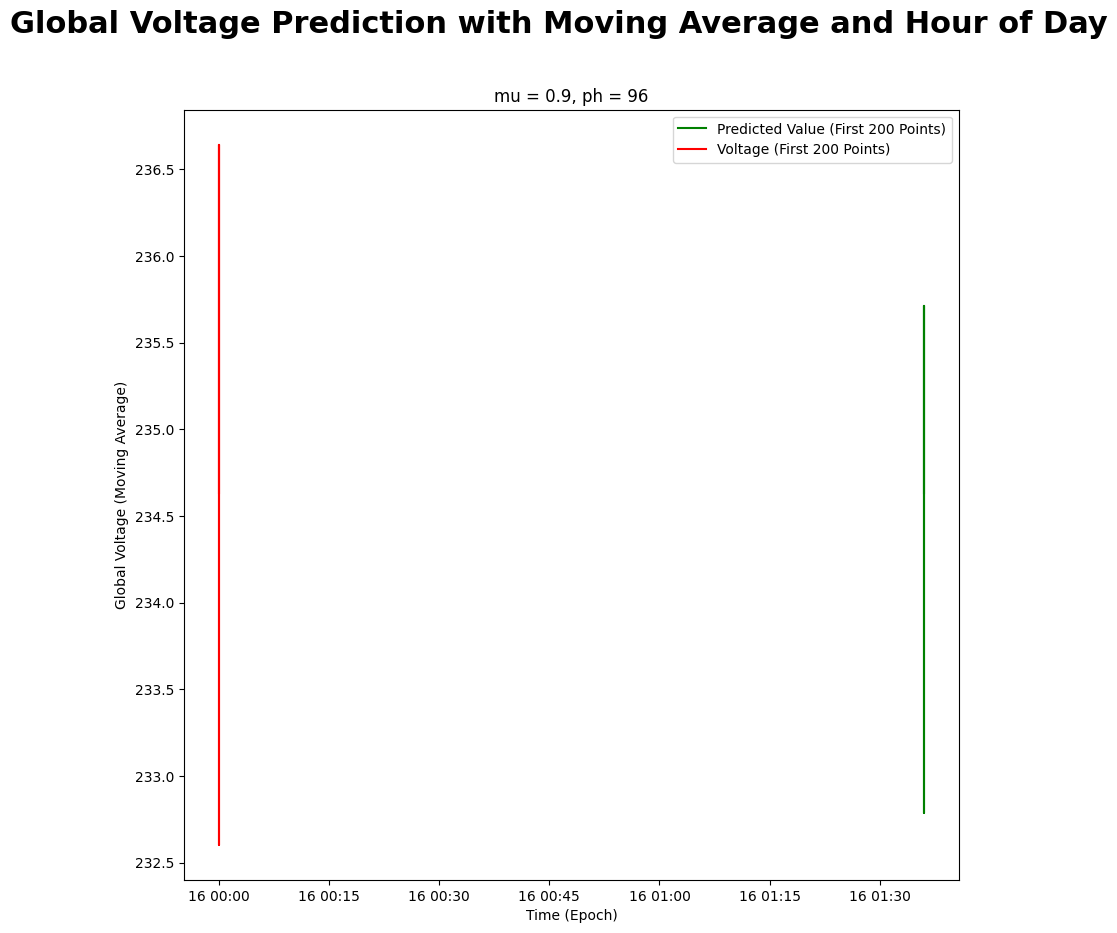

In [73]:
#Plot first 200 data points/predictions for alternative model
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Global Voltage Prediction with Moving Average and Hour of Day', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph = %g' % (mu, ph))

# Plot the actual values for the last 200 points
ax.plot(tp_pred_dates[0:200], yp_pred[0:200], label='Predicted Value (First 200 Points)', color='green')
ax.plot(pd.to_datetime(ts.iloc[0:200, 0], unit='s'), ys.iloc[0:200, 0], label='Voltage (First 200 Points)', color='red')

ax.set_xlabel('Time (Epoch)')
ax.set_ylabel('Global Voltage (Moving Average)')
ax.legend()
plt.show()

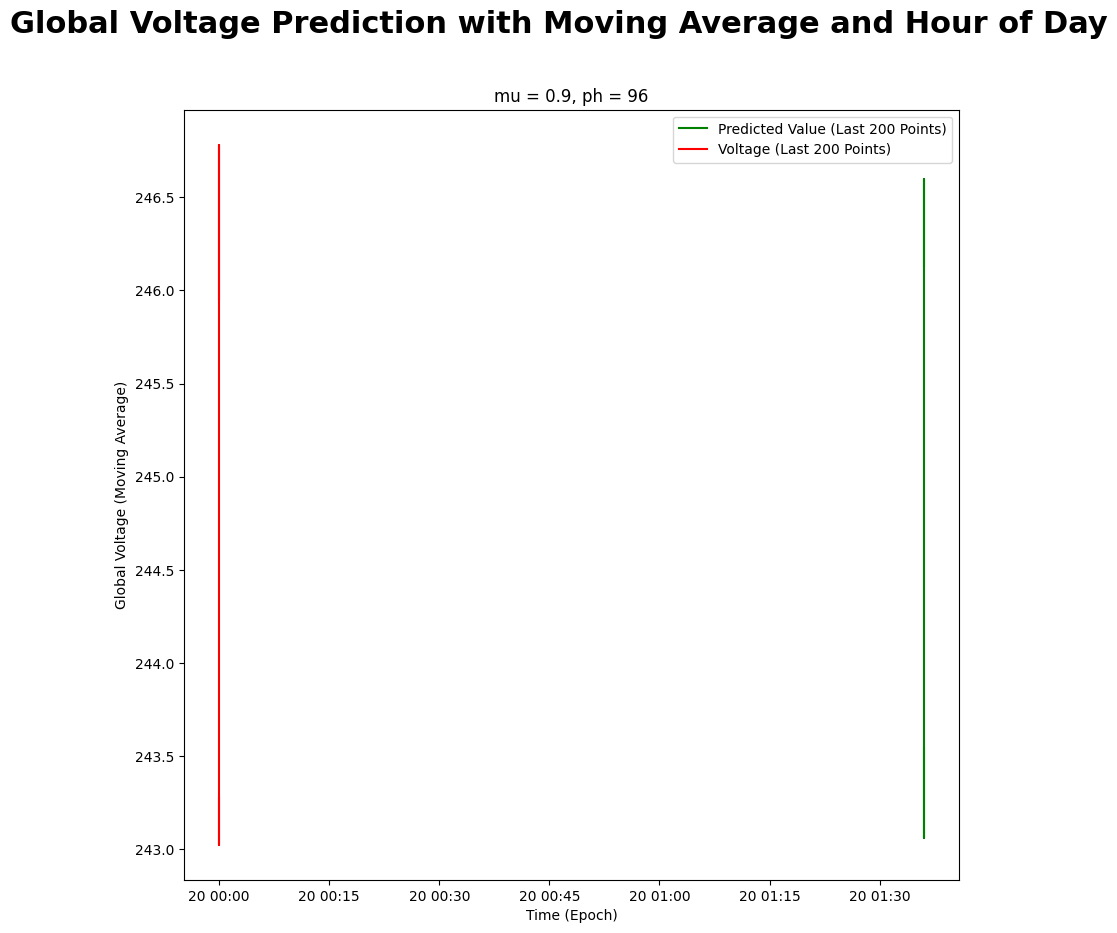

In [72]:
#Plot last 200 data points/predictions for alternative model
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Global Voltage Prediction with Moving Average and Hour of Day', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph = %g' % (mu, ph))

# Plot the actual values for the last 200 points
ax.plot(tp_pred_dates[-200:], yp_pred[-200:], label='Predicted Value (Last 200 Points)', color='green')
ax.plot(pd.to_datetime(ts.iloc[-200:, 0], unit='s'), ys.iloc[-200:, 0], label='Voltage (Last 200 Points)', color='red')

ax.set_xlabel('Time (Epoch)')
ax.set_ylabel('Global Voltage (Moving Average)')
ax.legend()
plt.show()


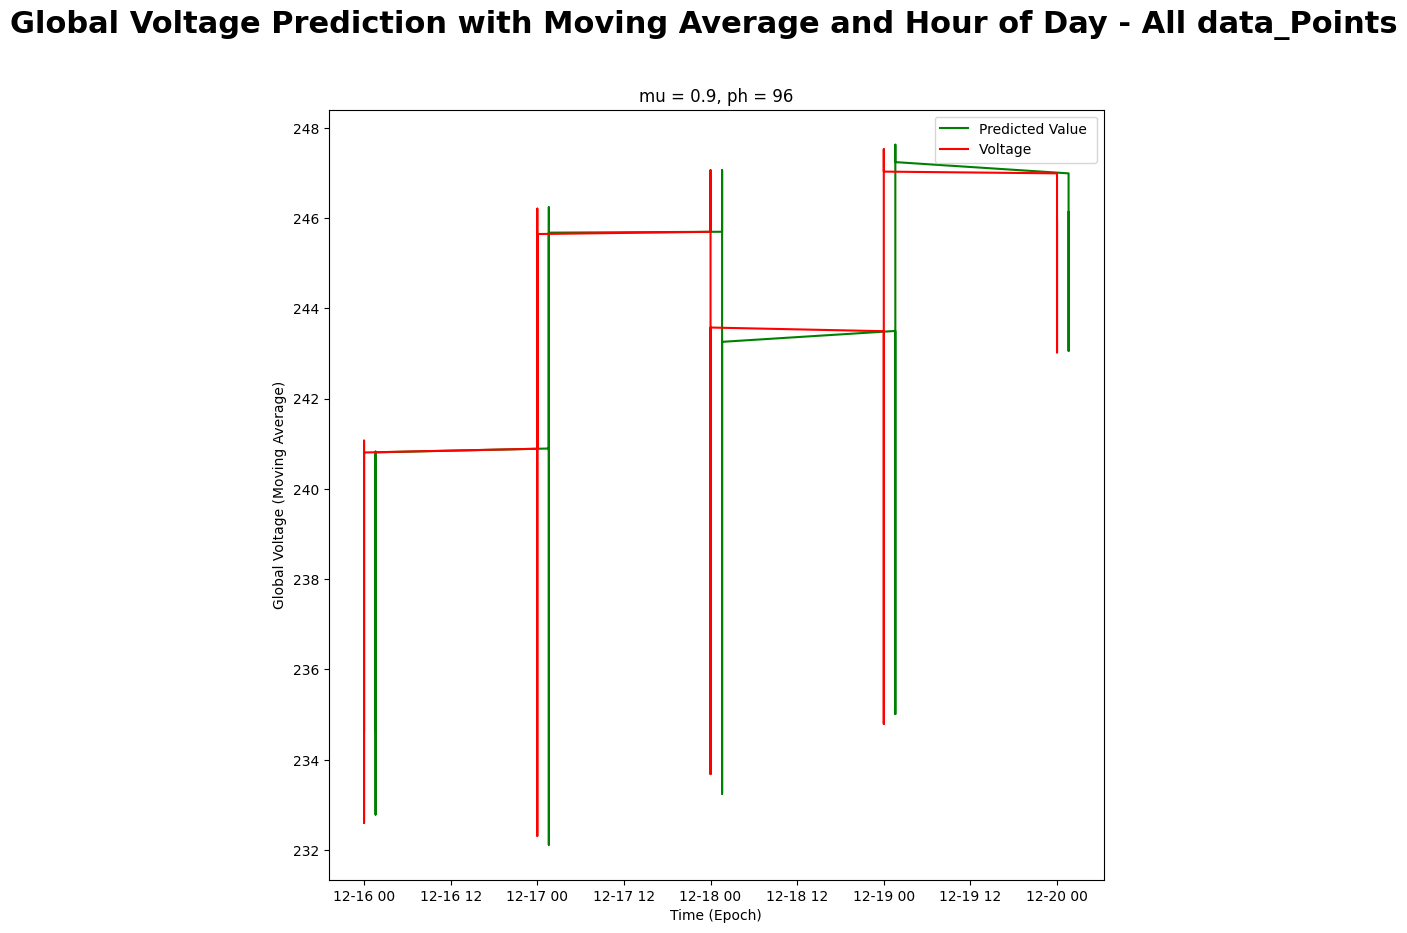

In [75]:
# All data points/predictions for alternative model
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Global Voltage Prediction with Moving Average and Hour of Day - All data_Points', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph = %g' % (mu, ph))

# Plot the actual values for the last 200 points
ax.plot(tp_pred_dates, yp_pred, label='Predicted Value ', color='green')
ax.plot(pd.to_datetime(ts.iloc[0:n_s, 0], unit='s'), ys.iloc[0:n_s, 0], label='Voltage ', color='red')

ax.set_xlabel('Time (Epoch)')
ax.set_ylabel('Global Voltage (Moving Average)')
ax.legend()
plt.show()

In [70]:
#Calculate MSE of predictions for alternative model
print("MSE of predictions of alternate model for Voltage with mu = 0.9 is", mse(ys['Voltage_MA'][ph_index:n_s], yp_pred[0:n_s - ph_index]))

MSE of predictions of alternate model for Voltage with mu = 0.9 is 11.615981693281146


**Q: Did your alternative model improve on our previous results? What else could you do to improve the model while still using linear regression?**

A:

It's worth noting that the results we're getting int his assignment are based on a pretty short predictive horizon of 5 minutes. If we were to increase our predictive horizon, our results would likely be worse and there would be more room for optimizing and improving the predictions of our model.